# Clustering with K-Means

In [ ]:
!pip install yellowbrick
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 30.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Test data
X, y, c = make_blobs(
    n_samples=500,
    cluster_std=0.8, # How spread out the clusters are
    centers=4,
    n_features=2,
    random_state=42,
    return_centers=True

)

In [ ]:
print(X.shape, y.shape, c.shape)

(500, 2) (500,) (4, 2)


In [ ]:
df_blobs = pd.DataFrame(
    {
        "x1" : X[:,0],
        "x2" : X[:,1],
        "y" : y
    }
)

In [ ]:
df_blobs

,x1,x2,y
0,-7.918909,6.760982,3
1,-9.037137,-6.923545,2
2,6.391721,1.326531,1
3,-2.822884,7.843474,0
4,-5.918656,-7.206570,2
...,...,...,...
495,-7.718843,8.063230,3
496,-2.570879,9.287208,0
497,-7.148255,-5.544892,2
498,-7.297806,-6.040902,2


In [ ]:
print(c)

[[-2.50919762  9.01428613]
 [ 4.63987884  1.97316968]
 [-6.87962719 -6.88010959]
 [-8.83832776  7.32352292]]


In [ ]:
df_centers = pd.DataFrame(
    {
        "x1" : c[:,0],
        "x2" : c[:,1],
    }
)

df_centers

,x1,x2
0,-2.509198,9.014286
1,4.639879,1.973170
2,-6.879627,-6.880110
3,-8.838328,7.323523


In [ ]:
plt.rcParams["font.family"] = "DejaVu Sans"

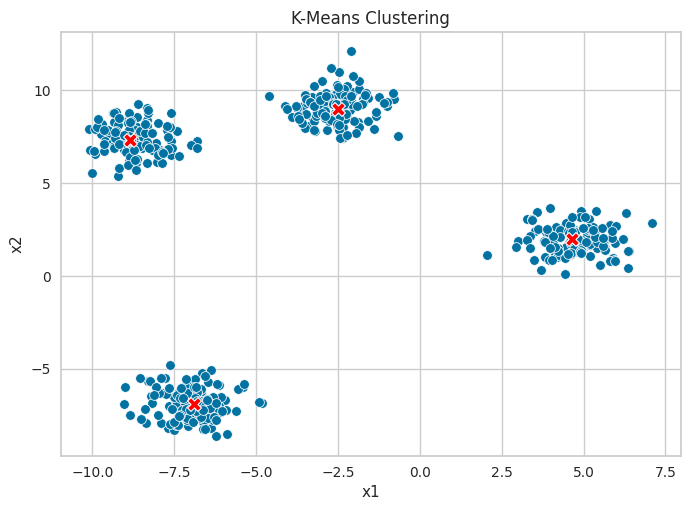

In [ ]:
sns.scatterplot(
    data=df_blobs,
    x="x1",
    y="x2"
)
sns.scatterplot(
    data=df_centers,
    x="x1",
    y="x2",
    marker="X",
    color="red",
    s=100
)
plt.title("K-Means Clustering")
plt.show()

In [ ]:
# Applying K-Means
kmeans = KMeans(n_clusters=4) # Assuming we don't know the number of clusters, real value is 4
df_cluster = kmeans.fit_predict(X)
df_blobs["cluster"] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_centers = pd.DataFrame(
    {
        "x1" : k_means_centers[:,0],
        "x2" : k_means_centers[:,1]
    }
)

In [ ]:
np.unique(df_cluster, return_counts=True) # Keep in mind, we only have three clusters according to KMeans assumption!

(array([0, 1, 2, 3], dtype=int32), array([125, 125, 125, 125]))

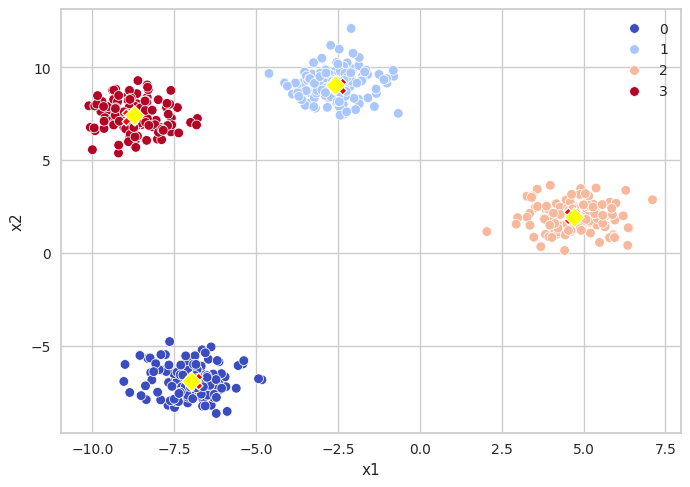

In [ ]:
sns.scatterplot(
    data=df_blobs,
    x="x1",
    y="x2",
    hue="cluster",
    palette="coolwarm"
)
sns.scatterplot(
    data=df_centers,  
    x='x1', 
    y='x2', 
    marker='X', 
    s=150 , 
    color='red'
)
sns.scatterplot(
    data=df_k_means_centers,
    x="x1",
    y="x2",
    marker="D",
    color="yellow",
    s=100
)
plt.show()

## How to optimize K values in K-Means algorithm
Keep in mind that K is the number of clusters in our dataset

### Elbow Method

Based on Within-cluster Sum of Squared Errors (WCSS), defined as squared distance among each point and the cluster centers, we can determine the optimal number of clusters.

$$
WCSS(C_{j}) = \sum_{p_{i}=1\ \in \ C_{j}}^{p_m} distance(C_j, p_i)^2
$$

<div style="text-align: center;">
    <img src="./kmeans.png" alt="KMeansClustering" width="450"/>
</div>


### Silhouette Method

It is a measure of how similar an object is to its own cluster compared to other clusters.

$$
s(i) = \frac{b(i) - a(i)}{max(b(i), a(i))}
$$


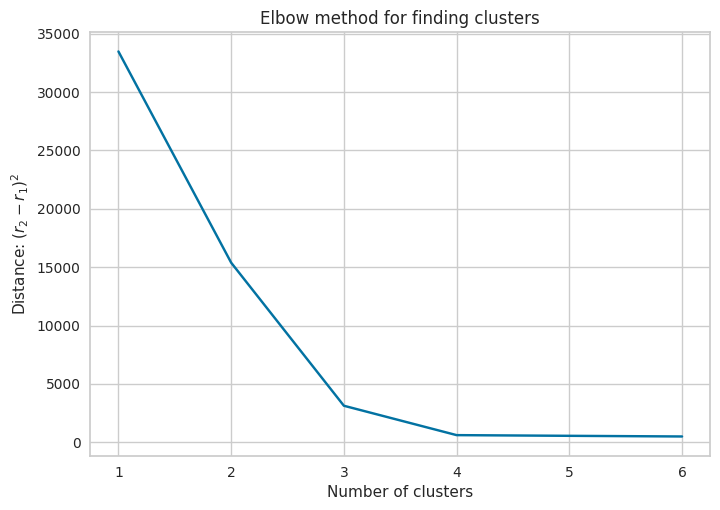

In [ ]:
# Elbow method
sum_of_squared_errors = []
for _ in range(1, 7):
    km = KMeans(n_clusters=_)
    km.fit(X)
    wcss = km.inertia_
    np.array(sum_of_squared_errors.append(wcss))

plt.plot(np.arange(1,7,1),sum_of_squared_errors, "bx-")
plt.ylabel(r"Distance: $(r_{2}-r_{1})^2$")
plt.xlabel("Number of clusters")
plt.title("Elbow method for finding clusters")
plt.show()

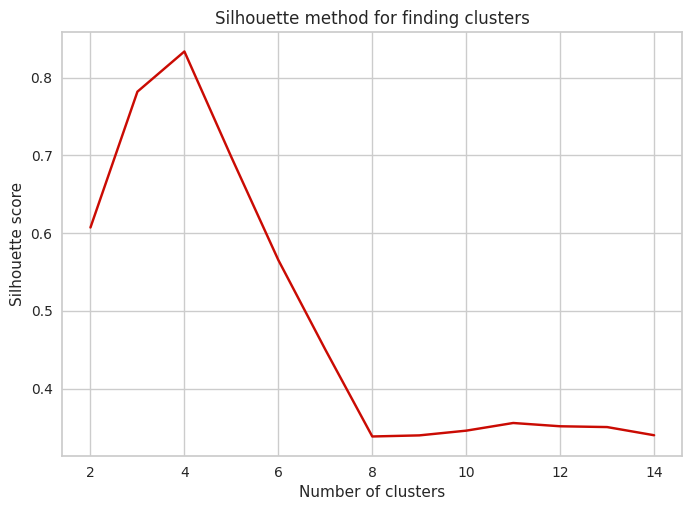

In [ ]:
# Silhouette method
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters=_)
    km = km.fit(X)
    y_pred = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y_pred))

plt.plot(K,silhouette_scores, "rx-")
plt.ylabel(r"Silhouette score")
plt.xlabel("Number of clusters")
plt.title("Silhouette method for finding clusters")
plt.show()

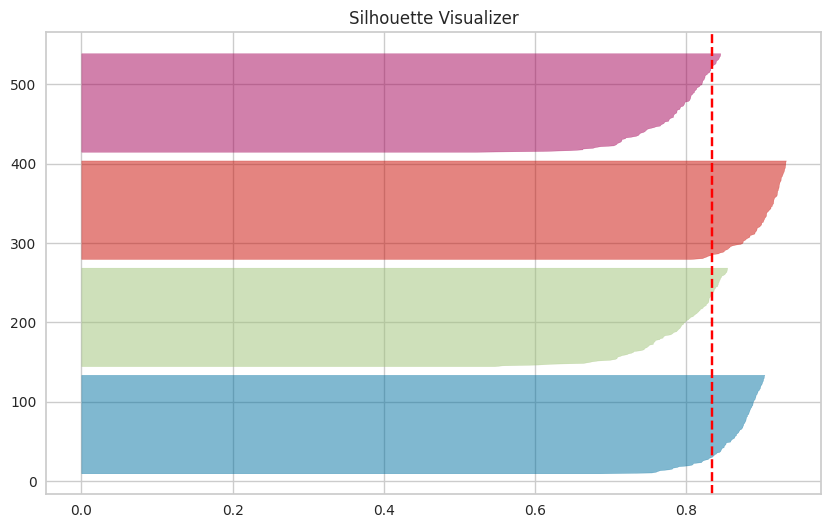

In [ ]:
plt.figure(figsize=(10,6))
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)
plt.title("Silhouette Visualizer")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49a4b13f-b86e-4dbe-8cae-5dc522a92da6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>